# Homework 4, Group B2

## FINM 37400 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# Group B2

# 1 HBS Case: The Information Content of the Yield Curve

## 1.1

The Term Spread
* What is the term spread? 

    * The term spread refers to the difference between the yield of 10-year Treasury notes and 3-month Treasury bills. Or equivalently, the difference between the yield of 10-year Treasury notes and the Fed Funds rate.

* What is the preferred measure of the term spread in the case?

    * The term spread can also be expressed as the average of expected **changes** + a term premium. In parcitular:

    $$ i_{t}^{10} - i_{t}^{1} = \sum_{j=1}^{9} \frac{10-j}{10}E_{t}[\Delta i^1_{t+j}] + tp_{t}$$

* What evidence is cited for the term spread's power in predicting recessions?

    * It is mentioned that the yield curve had inverted before every US recession in the past 50 years, including the 2020 recession.
    * There is a positive relationship between the slope of the yield curve and subsequent US real GDP. Yield curve slopes predict US real GDP rates with a lead time of about four to six quarters.
        * Although the level of the term spread is what has predictive power, a given change (in absolute value) is more meaningful the smaller the magnitud of the spread.
    
* Which is more important, the level of the term spread, its month-over-month change, or the level of short rates?
    * The most important predictor is the level of the term spread. Its month-over-month variation's absolute change is more meaningful the smaller the magnitud of the spread (i.e. its relative change is relevent). The level of short rates is not relevant in itself.



Using the file `yields.xlsx`, calculate the term spread at the end of the sample.
* What does this term spread suggest about economic growth, according to the evidence of Estrella?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Text(0, 0.5, 'Spread [10y-1y Treasury Rate]')

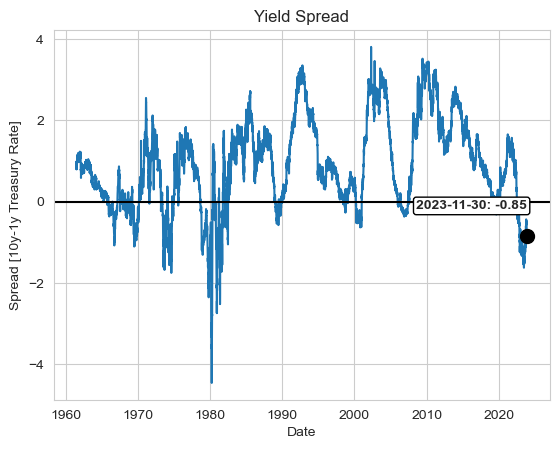

In [2]:
ydf=pd.read_excel("../data/yields.xlsx")
ydf['spread']=ydf[10]-ydf[1]

sns.set_style("whitegrid")
sns.lineplot(x=ydf['caldt'], y=ydf['spread'], markers=False)
plt.axhline(y=0, color='black')

last_value = ydf['spread'].iloc[-1]
plt.text(ydf['caldt'].iloc[-1], last_value+0.6, str(ydf['caldt'].iloc[-1])[:-9]+': '+str(round(last_value,2)), ha='right', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'), weight='bold')

plt.plot(ydf['caldt'].iloc[-1], last_value, marker='o', markersize=10, color='black')

plt.title('Yield Spread')
plt.xlabel('Date')
plt.ylabel('Spread [10y-1y Treasury Rate]')

According to Arturo Estrella a negative spread of ~ **-0.85** suggests a recession/slow growth period in the near future for the U.S. economy. 


## 1.2

Term premia
* What is the term premium? Why is it impossible to get a direct measure of it?

    * The spread can also be described as:

    $$ i_{t}^{10} - i_{t}^{1} = \sum_{j=1}^{9} \frac{10-j}{10}E_{t}[\Delta i^1_{t+j}] + tp_{t}$$

    The Term Premia, __*tp*__, is not an observable quantity. Intuitively, it reflects that the spread is explained not only by the expected average short-term changes but also by an additional source of long-term risk. We cannot directly measure it because it is not observable. There is no single quantity capturing what the long-term exclusive risk premium is. We can only estimate it.

    

* Explain equations (1) and (2). Why does Sacks think this concept of the term spread complicates the relationship found by Estrella?

    * Bringing equations (1) and (2) for ease:

    $$ i_{t}^{10} = \frac{1}{10} \sum_{j=0}^{9} E_{t}[i^1_{t+j}] + tp_{t} \tag{1}$$

    * _Equation 1_: The 10-year Treasury yield can be written as the expected average of the next 10 one-year rates plus a Term Premium.

    $$ i_{t}^{10} - i_{t}^{1} = \sum_{j=1}^{9} \frac{10-j}{10}E_{t}[\Delta i^1_{t+j}] + tp_{t} \tag{2}$$

    * _Equation 2_: The 10-year Tresury yield minus the 1-year Treasury yield (the difference) can be written as the expected average change of the nest 10 one-year periods plus a Term Premium.

    Sacks thought the Term Premium complicated the relationship found by Estrella because absent the term, the entire spread $i_t^{10}$ - $i_t^{1}$ could be attributed to the average expected change in 1-period changes, which are informative of economic activity. However, once we consider the Term Premium, there may be a shift in the spread even without changes in average expected 1-period changes in rates. The reading of the shift in spread would reverse. A decrease in the term spread stemming from a decrease in the Term Premium, as opposed to average expected 1-period changes, would likely be associated with a more favorable economic environment (lower risk) instead of less favorable conditions.


    




## 1.3

Though this case touches on monetary policy, that is not our focus. Rather, our focus is the degree to which the current shape of the yield curve is predictive of future short-term interest rates.



Suppose the term premium is zero. 
* What does a downward-sloping yield curve predict about future short-term rates? 

    * If the Term Premium is zero, a downward-sloping yield curve predicts lower expected short-term rates than current ones.

* In this case, is it risky to hold long-term bonds or short-term bonds? Is this risk compensated?

    * That would mean that it is risky to hold long-term bonds (yields are lower, prices are higher). The risk is not compensated, as the entire price variation can be explained by expected short-term averages. As a second order effect, there may be an assymetry in the expectation, but concentrating on the first-order effect for now.



Suppose the term premium increases 5 percentage points.
* What would change about your previous answer?

    * If there is a term premium now, part of the decrease would be explained by long-term-exclusive risk. Assuming that we are keeping the downward-slope constant, this would imply an even lower expectation for average short-term rates. These lower short-term rates would be indicative of deteriorating economic conditions. However, the risk would be partially compensated for in this case, since the decrease in yield cannot be explained only by a decrease in average short-term rates.

***

# 2 Calculating Forwards

Use the treasury issues in `'../data/select_maturities_2023-08-31.xlsx`. 

The selected treasuries are at nearly six-month intervals. Approximate that they mature at perfect 6-month intervals. 

In [3]:
df=pd.read_excel("../data/select_maturities_2023-08-31.xlsx")

## 2.1 
Bootstrap the discount factor. 

Plot the answer in terms of discount factors and discount rates.

#### Simplification 
Though the time-to-maturity (ttm) is not spaced exactly at 6 months, for the purposes of this problem, you are welcome to approximate that they are spaced at exact 6-month intervals.

In [4]:
def BootstrapData(df, maturities='maturity date', bid='bid', ask='ask', key='kytreasno'):
    dates = df[maturities].unique()
    dates=pd.to_datetime(dates)
    df['bas']=(df[bid]+df[ask])
    tdf=pd.DataFrame(columns=df.columns)
    for i in dates:
        dfi = df[df[maturities]==i].copy()
        idx = dfi['bas'].idxmin()
        tdf.loc[len(tdf)] = dfi.loc[idx]
    tdf.drop(columns=['bas'], inplace=True)
    return tdf

dfb=BootstrapData(df)

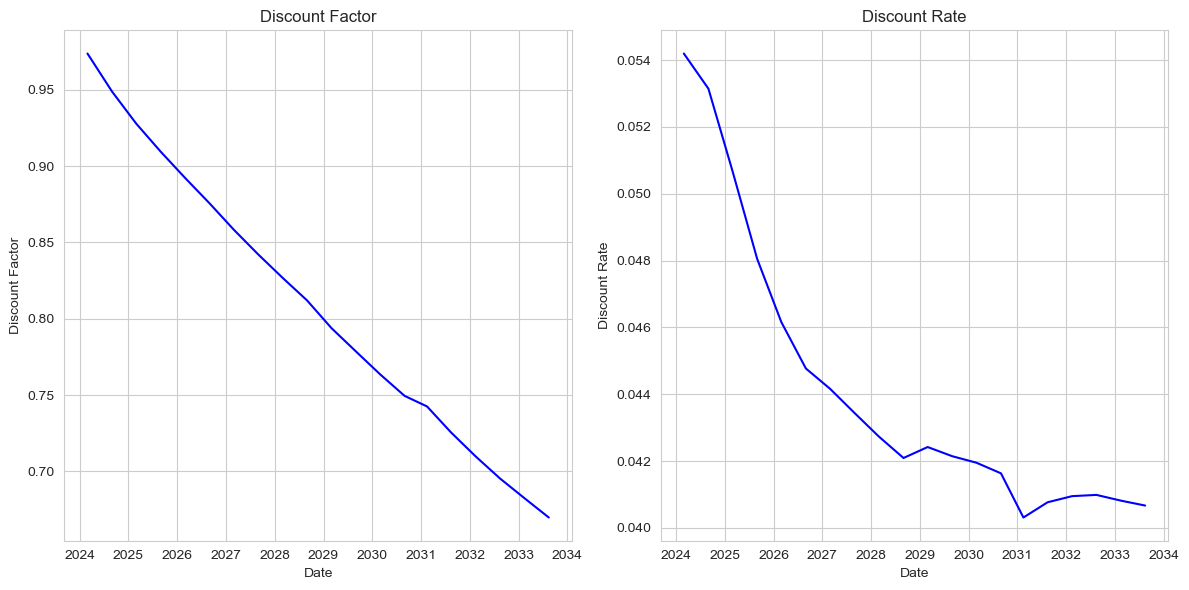

In [5]:
dfb['discount_factor']=1/((1+(dfb['ytm']*365.25/2))**(dfb['ttm']*2))
dfb['discount_rate']=dfb['ytm']*365.25

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(dfb['maturity date'], dfb['discount_factor'], color='blue')
ax1.set_title('Discount Factor')
ax1.set_xlabel('Date')
ax1.set_ylabel('Discount Factor')

ax2.plot(dfb['maturity date'], dfb['discount_rate'], color='blue')
ax2.set_title('Discount Rate')
ax2.set_xlabel('Date')
ax2.set_ylabel('Discount Rate')

plt.tight_layout()
plt.show()



## 2.2
Calculate and plot the forward discount factors from $T$ to $T+0.5$, ranging $T$ from 0.5 through 9.5.



Text(0, 0.5, 'Forward Discount Factors')

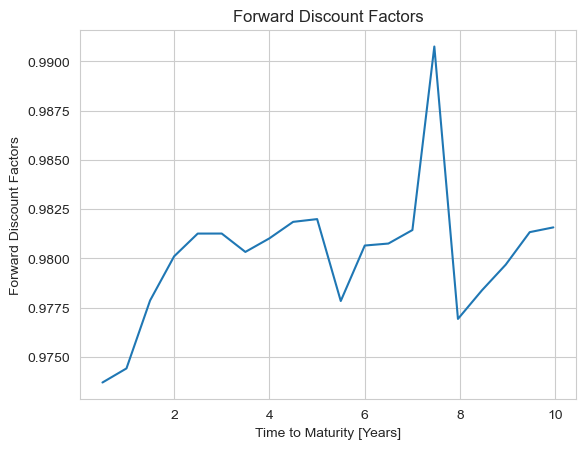

In [6]:
dfb['Forward_Discount_Factors']=dfb['discount_factor']/dfb['discount_factor'].shift(1)
dfb.loc[0,'Forward_Discount_Factors']=dfb.loc[0,'discount_factor']
tdfb=dfb.iloc[:21,:]
sns.lineplot(x=dfb['ttm'], y=dfb['Forward_Discount_Factors'], markers=False)
plt.title('Forward Discount Factors')
plt.xlabel('Time to Maturity [Years]')
plt.ylabel('Forward Discount Factors')


## 2.3
Use the forward discount factors to calculate the `semiannually` compounded forward **rates**.

Plot the curve.

Also report the forward-rate values from 

* $T_1=0.5$ to $T_2=1$.
* $T_1=9.5$ to $T_2=10$.


Text(0, 0.5, 'Forward Discount Rates [%]')

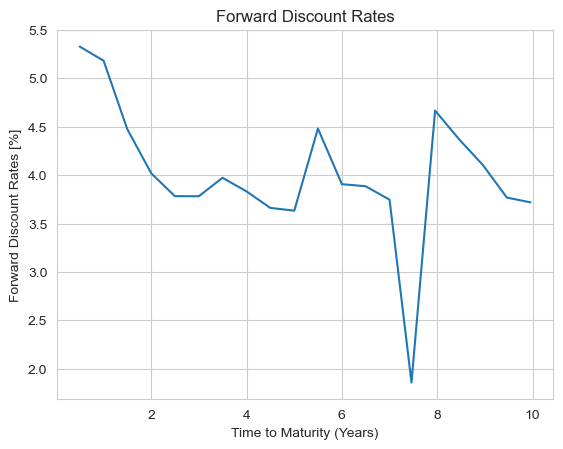

In [7]:
dfb['Forward_Discount_Rates']=-dfb['Forward_Discount_Factors'].apply(lambda x: np.log(x))*100/0.5
ttdfb=dfb.iloc[:21,:]
sns.lineplot(x=dfb['ttm'], y=dfb['Forward_Discount_Rates'], markers=False)
plt.title('Forward Discount Rates')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Forward Discount Rates [%]')


In [8]:
print('Forward rate 0.5 to 1: ', round(dfb.loc[1,'Forward_Discount_Rates'],2),'%')

Forward rate 0.5 to 1:  5.18 %


In [9]:
print('Forward rate 9.5 to 10: ', round(dfb.loc[19,'Forward_Discount_Rates'],2),'%')

Forward rate 9.5 to 10:  3.72 %



## 2.4
Explain how an FRA between $T_1$ and $T_2$ would function. 

An FRA comprises a Forward rate, a spot or reference rate, a time horizon (beginning and end in the future) and a notional amount. There are no main capital deposits. The investor and provider agree on the fixed rate (Forward rate) and the notional. There would also be a spot rate stipulated but not observed yet (e.g., SOFR). At T1, the spot rate will be observed. On T2, a difference between the spot rate and the forward rate is calculated, and the owning party would pay the receiving one.

***